<a href="https://colab.research.google.com/github/ColeBallard/basic-README-generator/blob/main/clothing_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [14]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [17]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [20]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [21]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3752 - accuracy: 0.8642
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3326 - accuracy: 0.8784
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3109 - accuracy: 0.8864
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2906 - accuracy: 0.8927
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2770 - accuracy: 0.8964
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2657 - accuracy: 0.9009
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2522 - accuracy: 0.9058
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2457 - accuracy: 0.9086
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2371 - accuracy: 0.9108
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.227

In [22]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3510 - accuracy: 0.8766 - 513ms/epoch - 2ms/step

Test accuracy: 0.8766000270843506


In [23]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [24]:
predictions = probability_model.predict(test_images)

In [28]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

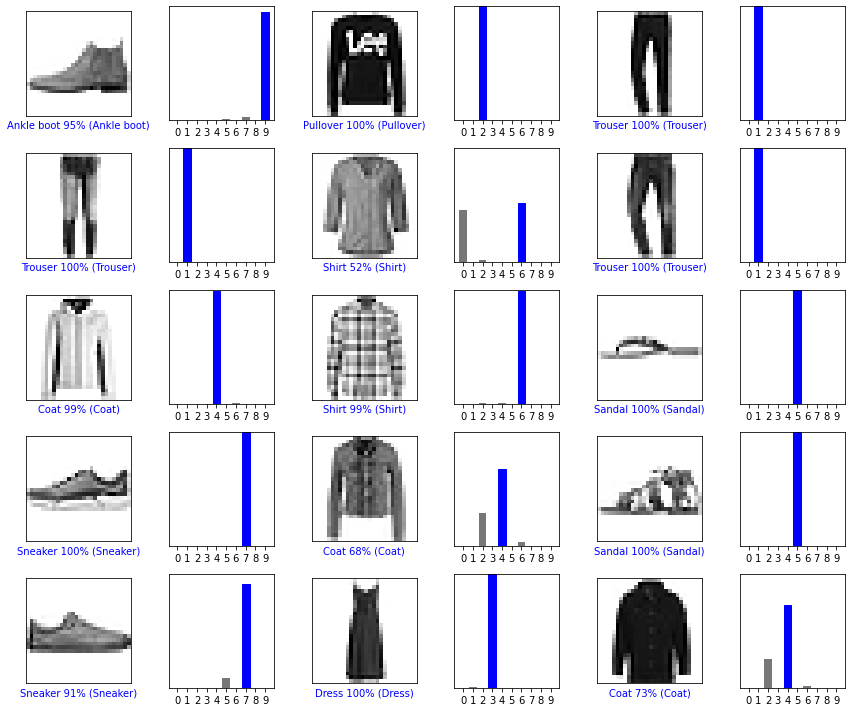

In [35]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()